# Quantization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['axes.grid'] = True
plt.rcParams['legend.frameon'] = True

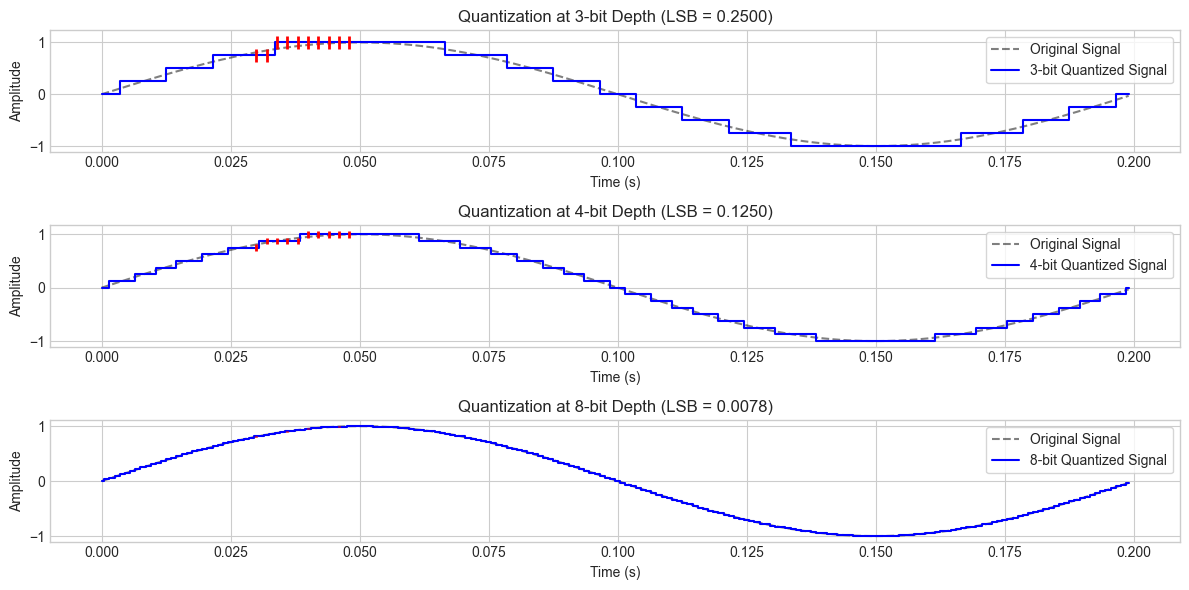

In [ ]:
# Generate a sine wave
fs = 1000  # Sampling frequency in Hz
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second of audio
freq = 5  # Hz
x = np.sin(2 * np.pi * freq * t)  # Original continuous signal

# Function to quantize signal
def quantize(signal, bit_depth):
    levels = 2 ** bit_depth
    quantized_signal = np.round((signal + 1) * (levels / 2)) / (levels / 2) - 1
    return quantized_signal

# Define bit depths to compare
bit_depths = [3, 4, 8]  # Few bits to highlight LSB effect

plt.figure(figsize=(12, 6))

for i, bits in enumerate(bit_depths, 1):
    quantized_x = quantize(x, bits)
    lsb_value = 2 / (2 ** bits)  # LSB value
    
    plt.subplot(len(bit_depths), 1, i)
    plt.plot(t[:200], x[:200], 'k', linestyle='dashed', alpha=0.5, label="Original Signal")
    plt.step(t[:200], quantized_x[:200], 'b', label=f"{bits}-bit Quantized Signal", where='mid')
    
    # Highlight LSB step
    for j in range(30, 50, 2):  # Select some steps to highlight
        plt.vlines(t[j], quantized_x[j] - lsb_value / 2, quantized_x[j] + lsb_value / 2, color="red", linewidth=2)

    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title(f"Quantization at {bits}-bit Depth (LSB = {lsb_value:.4f})")
    plt.legend()

plt.tight_layout()
plt.show()

| **Bit Depth** | **Number of Possible Values** | **Smallest Quantization Step** |
| -------------- | ------------------------------ | ----------------------------- |
| 8-bit          | 256                            | 1/127                         |
| 12-bit         | 4,096                          | 1/2047                        |
| 16-bit         | 65,536                         | 1/32767                       |
| 20-bit         | 1,048,576                      | 1/524287                      |
| 24-bit         | 16,777,216                     | 1/8388607                     |
| 32-bit         | 4,294,967,296                  | 1/2147483647                  |

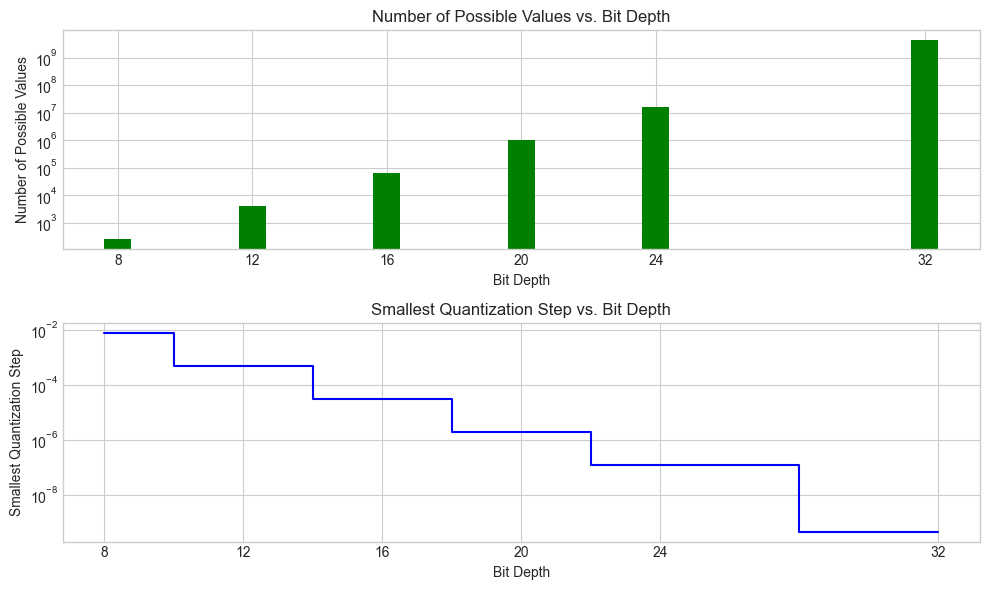

In [10]:
# Data
bit_depths = [8, 12, 16, 20, 24, 32]
num_possible_values = [256, 4096, 65536, 1048576, 16777216, 4294967296]
smallest_quantization_step = [1/127, 1/2047, 1/32767, 1/524287, 1/8388607, 1/2147483647]

# Plotting quantization levels
plt.figure(figsize=(10, 6))

# Bar plot for the number of possible values
plt.subplot(2, 1, 1)
plt.bar(bit_depths, num_possible_values, color='green')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Bit Depth')
plt.ylabel('Number of Possible Values')
plt.title('Number of Possible Values vs. Bit Depth')
plt.xticks(bit_depths)

# Step plot for the smallest quantization step
plt.subplot(2, 1, 2)
plt.step(bit_depths, smallest_quantization_step, where='mid', color='blue')
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.xlabel('Bit Depth')
plt.ylabel('Smallest Quantization Step')
plt.title('Smallest Quantization Step vs. Bit Depth')
plt.xticks(bit_depths)

plt.tight_layout()
plt.show()

## Dynamic Range

Dynamic range is the ratio between the **loudest possible** and **quietest distinguishable** signal level in a system. In digital audio, it is determined by the **bit depth** of the signal.

Mathematically, the **dynamic range (DR) in dB** is given by:

```math
\text{Dynamic Range} = 20 \log_{10}(2^b)
```

where:
- $b$ is the **bit depth** (e.g., 16-bit, 24-bit, etc.),
- $2^b$ represents the **number of quantization levels**.

### Approximation to 6 dB per Bit

Using logarithm properties, we can approximate:

```math
20 \log_{10}(2^b) = 20 b \log_{10}(2)
```

Since:

```math
\log_{10}(2) \approx 0.301
```

we get:

```math
20 \times 0.301 \times b \approx 6.02 b
```

Thus, for practical purposes:

```math
\text{Dynamic Range} \approx 6 b \text{ dB}
```

Applying this formula:

| **Bit Depth** | **Dynamic Range (dB)** |
|--------------|-----------------------|
| 8-bit       | 48 dB  |
| 12-bit      | 72 dB  |
| 16-bit      | 96 dB  |
| 20-bit      | 120 dB |
| 24-bit      | 144 dB |
| 32-bit      | 192 dB |

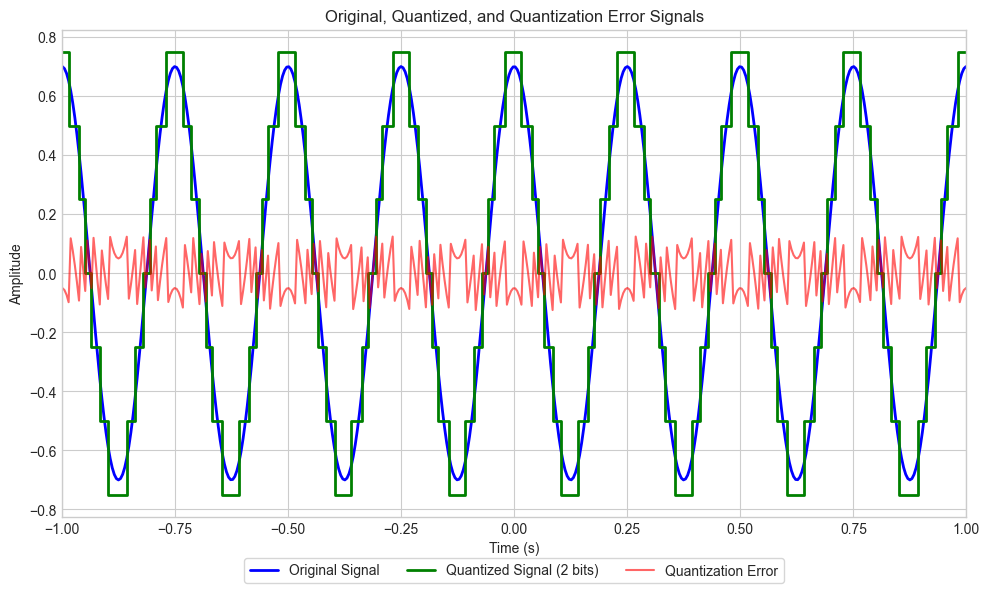

In [11]:
# Sampling parameters
fs = 48000    # Sampling rate
pt = 480      # Number of points in time domain
T = 1 / fs    # Sampling period

# Define a time vector for the discrete samples
t = np.linspace(-1.1, 1.1, pt)

# Define a signal with amplitude, frequency, phase
A = 0.7       # Amplitude
f0 = 4        # Frequency
phi = 0       # Phase

x_f0 = A * np.cos(2 * np.pi * f0 * t + phi)

# Quantization
n_bits = 2
quantization_step = 1 / 2 ** n_bits
quantized_signal = np.round(x_f0 / quantization_step) * quantization_step

# Quantization error
quantization_error = x_f0 - quantized_signal

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(t, x_f0, 'b', lw=2, label='Original Signal')
plt.step(t, quantized_signal, 'g', lw=2, label=f'Quantized Signal ({n_bits} bits)')
plt.plot(t, quantization_error, 'r', label='Quantization Error', alpha=0.6)
plt.xlim(-1., 1.)  # Adjusted limits for better visualization
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Original, Quantized, and Quantization Error Signals')

# Place the legend below the plot
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.grid(True)
plt.tight_layout()
plt.show()


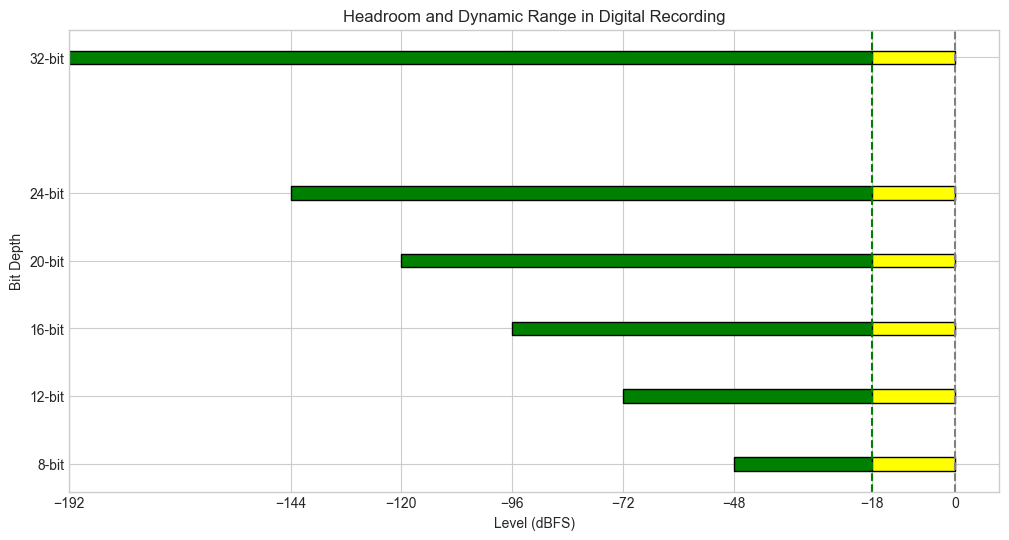

In [12]:
bit_depths = [8, 12, 16, 20, 24, 32]
dynamic_ranges = [6 * b for b in bit_depths]  # Dynamic range in dB (6 dB per bit)

headroom = 0  # Reference point for peak level
noise_floors = [-dr for dr in dynamic_ranges]  # Noise floor relative to dynamic range
analog_ref_level = -18  # 0dB analog reference level in dBFS

plt.figure(figsize=(12, 6))
x_tick_positions = [-18, 0]  # Include -18 and 0 dBFS explicitly

for b, nf, dr in zip(bit_depths, noise_floors, dynamic_ranges):
    # Compute segment widths
    green_width = min(abs(nf - analog_ref_level), dr)  # Part below -18 dBFS
    yellow_width = max(0, dr - green_width)  # Part above -18 dBFS

    # Draw green part (below -18 dBFS)
    plt.barh(b, width=green_width, left=nf, color="green", edgecolor="black")
    x_tick_positions.append(nf)  # Store starting position

    # Draw yellow part (above -18 dBFS)
    if yellow_width > 0:
        plt.barh(b, width=yellow_width, left=analog_ref_level, color="yellow", edgecolor="black")

# Add the analog reference level (-18 dBFS) as a vertical marker
plt.axvline(analog_ref_level, color="green", linestyle="--", label="0 dB Analog Level (-18 dBFS)")

# Formatting
plt.axvline(0, color="gray", linestyle="--", label="0 dBFS (Digital Full Scale)")
plt.title("Headroom and Dynamic Range in Digital Recording")
plt.xlabel("Level (dBFS)")
plt.ylabel("Bit Depth")
plt.yticks(bit_depths, [f"{b}-bit" for b in bit_depths])
plt.xticks(sorted(set(x_tick_positions)))  # Set x-axis ticks, ensuring uniqueness and order
plt.show()